# EDA and Cleaning of Lending Club Loan Data

In [57]:
import pandas as pd
import os
import seaborn as sns

## Making lite version for training

In [8]:
RAW_DATA_PATH = '../data/raw/lending-club-full.csv'
LITE_DATA_PATH = '../data/processed/lending-club-lite.csv'

In [9]:
# Cut the dataset to include essential columns only
cols_to_keep = [
    'loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
    'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
    'issue_d', 'loan_status', 'purpose', 'dti', 'earliest_cr_line',
    'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
    'initial_list_status', 'application_type', 'mort_acc', 'pub_rec_bankruptcies'
]

# Load first 100,000 rows (enough for a solid MVP)
df = pd.read_csv(RAW_DATA_PATH, usecols=cols_to_keep, nrows=100000)
print(f"Raw dataset shape: {df.shape}")

Raw dataset shape: (100000, 24)


In [10]:
# Using only "Completed" loans for training
# Ongoing loans can't be used because we don't know their final status yet

df = df[df['loan_status'].isin(['Fully Paid', 'Charged Off'])]
print(f"Dataset shape after filtering completed loans: {df.shape}")

Dataset shape after filtering completed loans: (2450, 24)


In [12]:
# Save the lite dataset
os.makedirs(os.path.dirname(LITE_DATA_PATH), exist_ok=True)
df.to_csv(LITE_DATA_PATH, index=False)
print(f"Lite dataset saved to {LITE_DATA_PATH}")

Lite dataset saved to ../data/processed/lending-club-lite.csv


## Checking the dataset

In [66]:
df = pd.read_csv(LITE_DATA_PATH)

In [18]:
print(f'Shape of the dataset: {df.shape}')

Shape of the dataset: (2450, 24)


In [19]:
print(f'Duplicates in the dataset: {df.duplicated().sum()}')

Duplicates in the dataset: 0


In [37]:
print(df.dtypes.sort_values())

loan_amnt                 int64
total_acc                 int64
revol_bal                 int64
pub_rec                   int64
open_acc                  int64
mort_acc                  int64
pub_rec_bankruptcies      int64
annual_inc              float64
revol_util              float64
dti                     float64
int_rate                float64
installment             float64
home_ownership           object
application_type         object
initial_list_status      object
term                     object
grade                    object
earliest_cr_line         object
purpose                  object
sub_grade                object
issue_d                  object
verification_status      object
emp_length               object
loan_status              object
dtype: object


In [24]:
print("Missing values per column:")
print(df.isnull().sum().sort_values(ascending=False))

Missing values per column:
emp_length              221
revol_util                6
dti                       4
loan_amnt                 0
installment               0
grade                     0
int_rate                  0
term                      0
home_ownership            0
sub_grade                 0
issue_d                   0
annual_inc                0
loan_status               0
purpose                   0
earliest_cr_line          0
verification_status       0
open_acc                  0
pub_rec                   0
revol_bal                 0
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies      0
dtype: int64


Columns with missing values

`emp_length`: Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.

`revol_util`: Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.

`dti`: A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.


<Axes: >

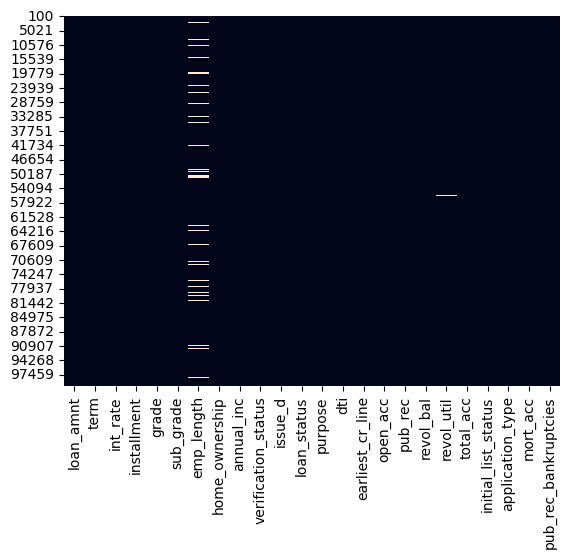

In [60]:
sns.heatmap(df.isnull(), cbar=False)

In [32]:
print(f'Distribution of target variable (count) - {df["loan_status"].value_counts()}')
print(f'\nDistribution of target variable (%) - {df["loan_status"].value_counts(normalize=True) * 100}')

Distribution of target variable (count) - loan_status
Fully Paid     2431
Charged Off      19
Name: count, dtype: int64

Distribution of target variable (%) - loan_status
Fully Paid     99.22449
Charged Off     0.77551
Name: proportion, dtype: float64


In [45]:
print(f'Negative numbers -> Income: {(df["annual_inc"] < 0).sum()} | Loan Amount: {(df["loan_amnt"] < 0).sum()} | DTI: {(df["dti"] < 0).sum()}')
print(f'Impossible values -> High DTI (>100): {(df["dti"] > 100).sum()}')

Negative numbers -> Income: 0 | Loan Amount: 0 | DTI: 0
Impossible values -> High DTI (>100): 4


In [54]:
obj_cols = df.select_dtypes(include='object').columns

print("Categories in column:\n")
for col in obj_cols:
    print(col)
    print(df[col].unique())
    print()

Categories in column:

term
[' 36 months' ' 60 months']

grade
['D' 'C' 'A' 'B' 'E' 'G' 'F']

sub_grade
['D5' 'C4' 'A3' 'B3' 'E5' 'D1' 'C1' 'A4' 'E1' 'B5' 'E4' 'B1' 'D2' 'B4'
 'B2' 'C3' 'A5' 'C2' 'A2' 'C5' 'D3' 'D4' 'E2' 'A1' 'E3' 'G2' 'F1' 'G4'
 'F2' 'F4']

emp_length
['5 years' '< 1 year' '10+ years' '3 years' '4 years' '1 year' '8 years'
 nan '2 years' '6 years' '9 years' '7 years']

home_ownership
['MORTGAGE' 'RENT' 'OWN' 'ANY']

verification_status
['Source Verified' 'Verified' 'Not Verified']

issue_d
['Dec-2018' 'Nov-2018' 'Oct-2018']

loan_status
['Fully Paid' 'Charged Off']

purpose
['debt_consolidation' 'credit_card' 'other' 'house' 'car'
 'home_improvement' 'moving' 'small_business' 'vacation' 'medical'
 'major_purchase' 'renewable_energy']

earliest_cr_line
['Jan-2012' 'Jun-2009' 'Feb-1999' 'Dec-2003' 'Oct-1997' 'Apr-1995'
 'Apr-2009' 'Mar-2004' 'Jun-2007' 'Oct-2002' 'Sep-2007' 'Feb-2006'
 'Jan-1987' 'Mar-2008' 'Dec-2005' 'May-2003' 'Jun-2005' 'Aug-1995'
 'Jan-2009' 'Mar-20

In [51]:
df[obj_cols].nunique()

term                     2
grade                    7
sub_grade               30
emp_length              11
home_ownership           4
verification_status      3
issue_d                  3
loan_status              2
purpose                 12
earliest_cr_line       411
initial_list_status      2
application_type         2
dtype: int64

## Cleaning the dataset

In [67]:
# Store original shape for comparison
original_shape = df.shape[0]

# Create a copy for cleaning
df_cleaned = df.copy()

In [75]:
# Handle missing values
print("Before cleaning:")
print("="*25)
print(f"Shape: {df.shape}")
print(f"Missing values:\n{df.isnull().sum()[df.isnull().sum() > 0]}\n")

# Drop rows with missing dti and revol_util (only 4 + 6 rows)
df_cleaned = df_cleaned.dropna(subset=['dti', 'revol_util'])

# For emp_length, impute with mode (most common value)
emp_length_mode = df_cleaned['emp_length'].mode()[0]
df_cleaned['emp_length'] = df_cleaned['emp_length'].fillna(emp_length_mode)

print("After handling missing values:")
print("="*25)
print(f"Shape: {df_cleaned.shape}")
print(f"Missing values: {df_cleaned.isnull().sum().sum()}\n")

Before cleaning:
Shape: (2450, 24)
Missing values:
emp_length    221
dti             4
revol_util      6
dtype: int64

After handling missing values:
Shape: (2440, 24)
Missing values: 0



In [76]:
# Handle outliers (DTI > 100)
print(f"Shape before removing DTI outliers: {df_cleaned.shape}")

# Remove unrealistic DTI values (>100 is essentially debt equal to or exceeding monthly income)
df_cleaned = df_cleaned[df_cleaned['dti'] <= 100]

print(f"Shape after removing DTI outliers: {df_cleaned.shape}\n")

Shape before removing DTI outliers: (2440, 24)
Shape after removing DTI outliers: (2436, 24)



In [77]:
# Save cleaned dataset
CLEANED_DATA_PATH = '../data/processed/lending-club-cleaned.csv'

df_cleaned.reset_index(drop=True, inplace=True)
df_cleaned.to_csv(CLEANED_DATA_PATH, index=False)

# Calculate actual rows removed
rows_removed = original_shape - df_cleaned.shape[0]
rows_removed_pct = (rows_removed / original_shape) * 100

print("CLEANING SUMMARY")
print("=" * 50)
print(f"Original dataset shape: {original_shape}")
print(f"Final dataset shape: {df_cleaned.shape[0]}")
print(f"Rows removed: {rows_removed} ({rows_removed_pct:.2f}%)")
print(f"No missing values remaining: {df_cleaned.isnull().sum().sum() == 0}")
print(f"\nCleaned dataset saved to: {CLEANED_DATA_PATH}")

CLEANING SUMMARY
Original dataset shape: 2450
Final dataset shape: 2436
Rows removed: 14 (0.57%)
No missing values remaining: True

Cleaned dataset saved to: ../data/processed/lending-club-cleaned.csv
